In [39]:
%load_ext autoreload
%autoreload 2

In [2]:
!ls ../raw_data/

holidays_events.csv  sample_submission.csv  test.csv   transactions.csv
oil.csv		     stores.csv		    train.csv


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data = pd.read_csv('../raw_data/train.csv')
test_data = pd.read_csv('../raw_data/test.csv')
holiday_data = pd.read_csv('../raw_data/holidays_events.csv')
oil_data = pd.read_csv('../raw_data/oil.csv')

stores_data = pd.read_csv('../raw_data/stores.csv')
transactions_data = pd.read_csv('../raw_data/transactions.csv')

# Train data

In [58]:
train_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [6]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [57]:
train_data['sales'].sort_values()

0               0.000
1899470         0.000
813143          0.000
1899467         0.000
1899466         0.000
              ...    
2153031     63434.000
2139699     76090.000
2144154     87438.516
2445984     89576.360
2163723    124717.000
Name: sales, Length: 3000888, dtype: float64

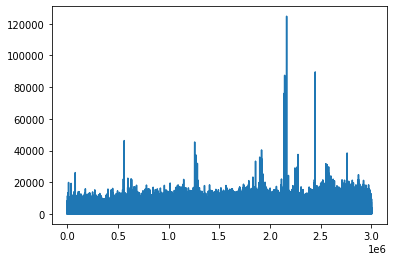

In [63]:
plt.plot(train_data['sales'])

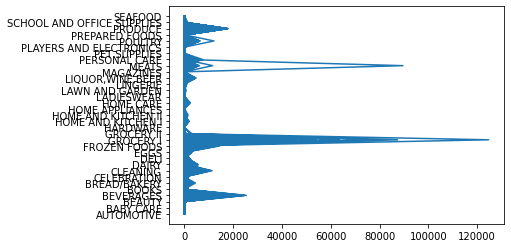

In [70]:
plt.plot(train_data['sales'], train_data['family'])

Promotion ? (Value - onpromotion)

In [55]:
train_data['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

In [53]:
train_data.count()

id             3000888
date           3000888
store_nbr      3000888
family         3000888
sales          3000888
onpromotion    3000888
dtype: int64

In [52]:
test_data.count()

id             28512
date           28512
store_nbr      28512
family         28512
onpromotion    28512
dtype: int64

# Oil data

In [11]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [34]:
oil_data['dcoilwtico'].unique()

array([   nan,  93.14,  92.97,  93.12,  93.2 ,  93.21,  93.08,  93.81,
        93.6 ,  94.27,  93.26,  94.28,  95.49,  95.61,  96.09,  95.06,
        95.35,  95.15,  95.95,  97.62,  97.98,  97.65,  97.46,  96.21,
        96.68,  96.44,  95.84,  95.71,  97.01,  97.48,  97.03,  97.3 ,
        96.69,  94.92,  92.79,  92.74,  92.63,  92.84,  92.03,  90.71,
        90.13,  90.88,  90.47,  91.53,  92.01,  92.07,  92.44,  92.47,
        93.03,  93.49,  93.71,  92.46,  93.41,  94.55,  95.99,  96.53,
        97.24,  97.1 ,  97.23,  95.02,  92.76,  93.36,  94.18,  94.59,
        93.44,  91.23,  88.75,  88.73,  86.65,  87.83,  88.04,  88.81,
        89.21,  91.07,  93.27,  94.09,  93.22,  90.74,  93.7 ,  95.25,
        95.8 ,  95.28,  96.24,  95.81,  94.76,  93.96,  93.95,  94.85,
        95.72,  96.29,  95.55,  93.98,  94.12,  93.84,  94.65,  93.13,
        93.57,  91.93,  93.66,  94.71,  96.11,  95.82,  95.5 ,  95.98,
        96.66,  97.83,  97.86,  98.46,  98.24,  94.89,  95.07,  95.47,
      

Date is a object (Convert datetime)

In [49]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


# Holiday data

In [9]:
holiday_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


Type of holiday (Categorical)

In [33]:
holiday_data['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

Type of locale

In [36]:
holiday_data['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

Date is an object (Convert datetime)

In [48]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


# Stores data

In [13]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


Type (Categorical)

In [35]:
stores_data['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

we have 54 stores in total

In [14]:
stores_data.count()

store_nbr    54
city         54
state        54
type         54
cluster      54
dtype: int64

# Transactions data

In [42]:
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


Date is an object (Convert datetime)

In [71]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
